# Plot Posteriors

This notebook uses the public code to plot the posterior distributions from MultiSWAG and pyDelfi

In [1]:
import sys
import torch
import numpy as np
import getdist.plots
from getdist.mcsamples import loadMCSamples
sys.path.append("../cosmoswag") 
from swag import SWAGModel
from cmb_simulator import *
from data_object import read_data

### Load the data and parameters

In [2]:
data = read_data()
x_train, y_train, x_val, y_val = data.get_data()
delta_x = data.get_error()
nin = x_train.shape[1]
npars = y_train.shape[1]
model = SWAGModel(nin=nin, npars=npars)

### Load the multiSWAG model and generate samples

In [3]:
nin = x_val.shape[1]
npars = y_val.shape[1]
model = SWAGModel(nin=nin, npars = npars)
model.load("cmb_noisy_errors.pt")

samples = model.generate_samples(x_val, nsamples=1000, scale=.5, verbose=True, delta_x = delta_x)

Generated 100 samples.
Generated 200 samples.
Generated 300 samples.
Generated 400 samples.
Generated 500 samples.
Generated 600 samples.
Generated 700 samples.
Generated 800 samples.
Generated 900 samples.


### Convert to GetDist for plotting

In [15]:
ind = -3 # Which of the validation simulations to use
samples_cosmo = data.unnormalize_params(samples[:,ind]).detach().numpy()
names = ["H0", "omch2",  "ombh2", "As", "ns"]
labels =  ["H_0", "\Omega_\mathrm{c} h^2", "\Omega_\mathrm{b} h^2", "\log A", "n_s"]
swag = getdist.MCSamples(samples=samples_cosmo,names = names, labels = labels)
params = data.unnormalize_params(y_val).detach().numpy()

Removed no burn in


### Generate plots

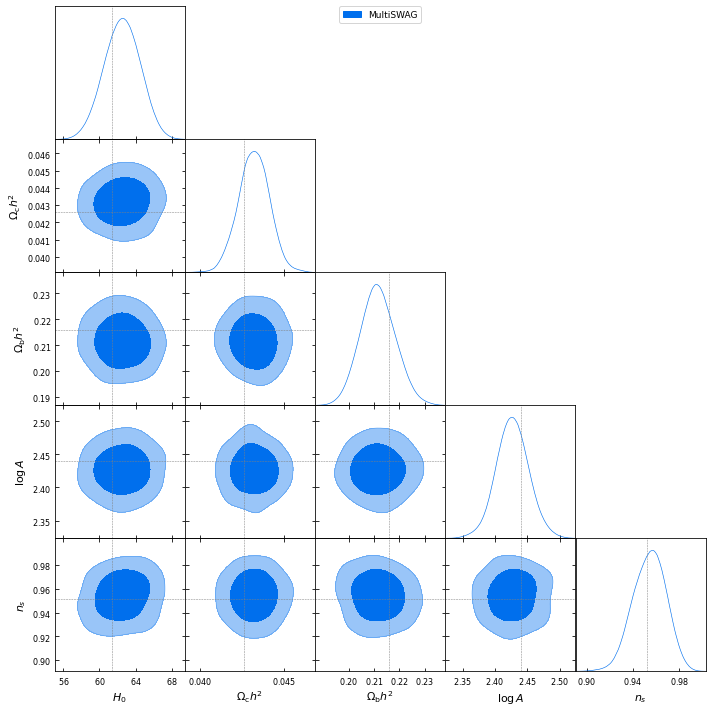

In [16]:
g = getdist.plots.getSubplotPlotter()
g.triangle_plot([swag], 
                ["H0", "omch2",  "ombh2", "As", "ns"], 
                filled=True,
                legend_labels = ['MultiSWAG', 'pyDelfi'],
                markers={'H0':params[ind,0],
                         'omch2':params[ind,1],
                         'ombh2':params[ind,2],
                         'As':params[ind,3],
                         'ns':params[ind,4]}
               )

In [14]:
params[ind]

array([7.9985268e+01, 1.5989237e-02, 1.5567884e-02, 2.1795082e+00,
       8.8496739e-01], dtype=float32)

In [10]:
model.separate_mu_sigma(model(x_val[:5]))

(tensor([[ 0.6120,  0.7142,  0.4353,  1.2141,  0.8591],
         [ 0.2249,  0.7012,  0.8059,  0.5162,  0.9909],
         [ 0.6574,  0.8200,  0.0095,  0.5498,  0.8191],
         [ 0.5880, -0.0226,  0.1778,  0.0638,  0.1469],
         [ 0.9035, -0.1077,  0.3272,  0.1988,  1.0211]],
        grad_fn=<SliceBackward0>),
 tensor([[ -8.6124,  -9.6116, -10.3597,  -8.7809,  -8.0354],
         [ -5.6236,  -7.8265,  -4.9198,  -9.5526, -13.2194],
         [ -9.0883,  -8.1678, -13.2783,  -8.2113,  -8.3198],
         [-10.5293,  -9.0694, -12.3999,  -9.3676,  -6.5931],
         [ -5.0654,  -8.6349,  -7.8270,  -9.1505,  -8.0188]],
        grad_fn=<AddBackward0>))

In [11]:
np.exp(250)

3.7464546145026734e+108